#Exemples de la fonction de rebalancement équilibrée 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.data_processing import load_returns_data, rebalanced_equal_weighted_portfolio_clean


## Chargement des données


In [11]:
# Charger les données des secteurs
df_sectors = load_returns_data('data/raw/msci_acwi_imi_sectors_daily_returns_202007_202508.csv')
print(f"[Secteurs] Données chargées : {len(df_sectors)} lignes")
print(f"[Secteurs] Nombre d'actifs : {len(df_sectors.columns) - 1}")
print(f"[Secteurs] Période : {df_sectors['date'].min()} à {df_sectors['date'].max()}")
print(f"[Secteurs] Premières colonnes : {list(df_sectors.columns[:5])}")

# Charger les données des factors
df_benchmark = load_returns_data('data/raw/msci_acwi_imi_daily_returns_202007_202508.csv')
print(f"[Facteurs] Données chargées : {len(df_benchmark)} lignes")
print(f"[Facteurs] Nombre d'actifs : {len(df_benchmark.columns) - 1}")
print(f"[Facteurs] Période : {df_benchmark['date'].min()} à {df_benchmark['date'].max()}")
print(f"[Facteurs] Premières colonnes : {list(df_benchmark.columns[:5])}")

# Charger les données des pays
df_thematic = load_returns_data('data/raw/msci_acwi_imi_thematics_daily_returns_202007_202508.csv')
print(f"[Pays] Données chargées : {len(df_thematic)} lignes")
print(f"[Pays] Nombre d'actifs : {len(df_thematic.columns) - 1}")
print(f"[Pays] Période : {df_thematic['date'].min()} à {df_thematic['date'].max()}")
print(f"[Pays] Premières colonnes : {list(df_thematic.columns[:5])}")


[Secteurs] Données chargées : 1328 lignes
[Secteurs] Nombre d'actifs : 11
[Secteurs] Période : 2020-07-01 00:00:00 à 2025-08-01 00:00:00
[Secteurs] Premières colonnes : ['MSCI ACWI IMI Consumer Discretionary Index', 'MSCI ACWI IMI Consumer Staples Index', 'MSCI ACWI IMI Energy Index', 'MSCI ACWI IMI Financials Index', 'MSCI ACWI IMI Healthcare Index']
[Facteurs] Données chargées : 1328 lignes
[Facteurs] Nombre d'actifs : 1
[Facteurs] Période : 2020-07-01 00:00:00 à 2025-08-01 00:00:00
[Facteurs] Premières colonnes : ['MXWDIM Index', 'date']
[Pays] Données chargées : 1328 lignes
[Pays] Nombre d'actifs : 40
[Pays] Période : 2020-07-01 00:00:00 à 2025-08-01 00:00:00
[Pays] Premières colonnes : ['MSCI ACWI IMI Accelerating Change Index', 'MSCI ACWI IMI Ageing Society Opportunities Index', 'MSCI ACWI IMI Blockchain Economy Index', 'MSCI ACWI IMI Clean Energy Infrastructure Index', 'MSCI ACWI IMI Digital Economy']


## Calcul du portefeuille équipondéré avec rebalancement mensuel


In [12]:
# Calculer le portefeuille équipondéré avec rebalancement au 1er de chaque mois pour les secteurs
portfolio_returns_sectors = rebalanced_equal_weighted_portfolio_clean(df_sectors, rebalance_day=1)

print(f"[Secteurs] Retours calculés : {len(portfolio_returns_sectors)}")
print(f"[Secteurs] Valeurs non-NaN : {portfolio_returns_sectors.notna().sum()}")
print(f"\n[Secteurs] Premiers retours :")
print(portfolio_returns_sectors.head(20))

# Calculer le portefeuille équipondéré avec rebalancement au 1er de chaque mois pour les thematics
portfolio_returns_thematic = rebalanced_equal_weighted_portfolio_clean(df_thematic, rebalance_day=1)

print(f"[Thématiques] Retours calculés : {len(portfolio_returns_thematic)}")
print(f"[Thématiques] Valeurs non-NaN : {portfolio_returns_thematic.notna().sum()}")
print(f"\n[Thématiques] Premiers retours :")
print(portfolio_returns_thematic.head(20))


[Secteurs] Retours calculés : 1328
[Secteurs] Valeurs non-NaN : 1328

[Secteurs] Premiers retours :
date
2020-07-01    0.005549
2020-07-02    0.009988
2020-07-03    0.000301
2020-07-06    0.015519
2020-07-07   -0.009112
2020-07-08    0.003588
2020-07-09   -0.006268
2020-07-10    0.007313
2020-07-13    0.000273
2020-07-14    0.005953
2020-07-15    0.011622
2020-07-16   -0.004649
2020-07-17    0.003339
2020-07-20    0.003883
2020-07-21    0.008874
2020-07-22    0.001361
2020-07-23   -0.004597
2020-07-24   -0.006890
2020-07-27    0.007560
2020-07-28   -0.001670
Name: equal_weighted_portfolio, dtype: float64
[Thématiques] Retours calculés : 1328
[Thématiques] Valeurs non-NaN : 1328

[Thématiques] Premiers retours :
date
2020-07-01    0.005413
2020-07-02    0.010747
2020-07-03    0.001593
2020-07-06    0.018752
2020-07-07   -0.006368
2020-07-08    0.010953
2020-07-09    0.001606
2020-07-10    0.003200
2020-07-13   -0.009091
2020-07-14    0.008104
2020-07-15    0.013625
2020-07-16   -0.00866

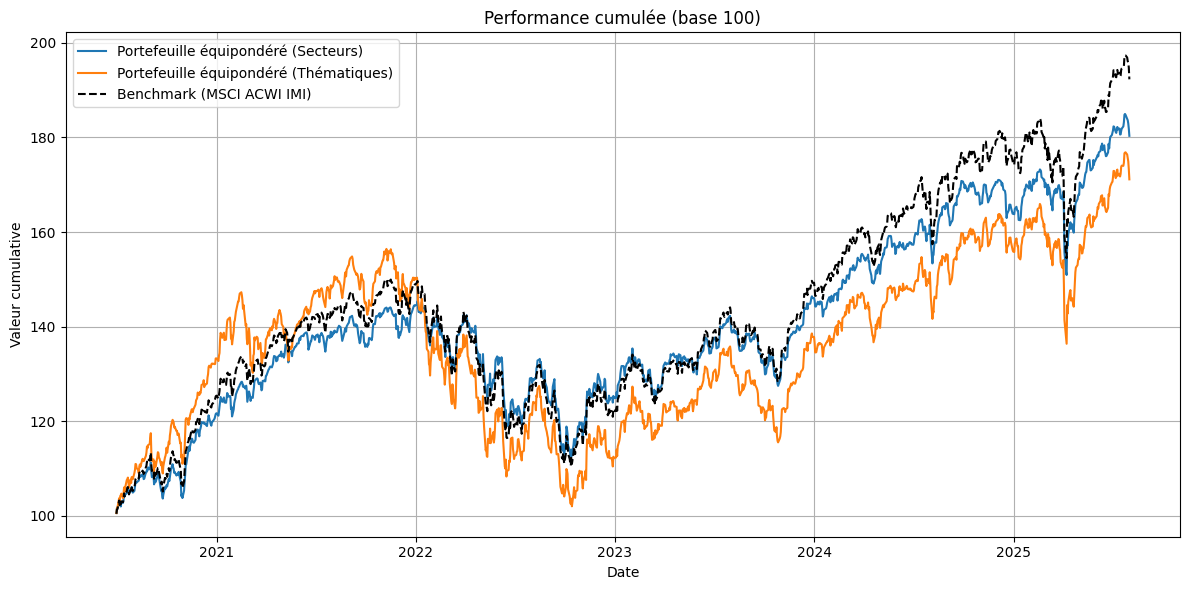

In [13]:
import matplotlib.pyplot as plt

# Calculer la performance cumulée (base 100) : base_value * (1 + r1) * (1 + r2) * ...
def performance_base_100(returns, base=100):
    perf = (1 + returns.fillna(0)).cumprod() * base
    return perf

perf_sectors = performance_base_100(portfolio_returns_sectors)
perf_thematic = performance_base_100(portfolio_returns_thematic)

# Calcul de la performance du benchmark (première colonne qui n'est pas 'date')
benchmark_col = [col for col in df_benchmark.columns if col != 'date'][0]
benchmark_returns = df_benchmark.set_index('date')[benchmark_col]
perf_benchmark = performance_base_100(benchmark_returns)

plt.figure(figsize=(12, 6))
plt.plot(perf_sectors.index, perf_sectors.values, label='Portefeuille équipondéré (Secteurs)')
plt.plot(perf_thematic.index, perf_thematic.values, label='Portefeuille équipondéré (Thématiques)')
plt.plot(perf_benchmark.index, perf_benchmark.values, label='Benchmark (MSCI ACWI IMI)', color='k', linestyle='--')

plt.title("Performance cumulée (base 100)")
plt.xlabel("Date")
plt.ylabel("Valeur cumulative")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# Matrice de corrélation entre tous les fonds sectoriels et thématiques

# On concatène les deux DataFrames (secteurs et thématiques) sans la colonne 'date'
cols_secteurs = [col for col in df_sectors.columns if col != 'date']
cols_thematic = [col for col in df_thematic.columns if col != 'date']

# Concaténer sur la colonne 'date', faire un inner join pour ne garder que les dates communes
returns_all = pd.merge(
    df_sectors[['date'] + cols_secteurs],
    df_thematic[['date'] + cols_thematic],
    on='date',
    how='inner'
).set_index('date')

correlation_matrix = returns_all.corr()

print("Matrice de corrélation (secteurs et thématiques) :")
print(correlation_matrix.round(2))


Matrice de corrélation (secteurs et thématiques) :
                                                    MSCI ACWI IMI Consumer Discretionary Index  \
MSCI ACWI IMI Consumer Discretionary Index                                                1.00   
MSCI ACWI IMI Consumer Staples Index                                                      0.51   
MSCI ACWI IMI Energy Index                                                                0.35   
MSCI ACWI IMI Financials Index                                                            0.69   
MSCI ACWI IMI Healthcare Index                                                            0.56   
MSCI ACWI IMI Industrials Index                                                           0.76   
MSCI ACWI IMI Information Technology Index                                                0.83   
MSCI ACWI IMI Materials Index                                                             0.65   
MSCI ACWI IMI Real Estate Index                                    

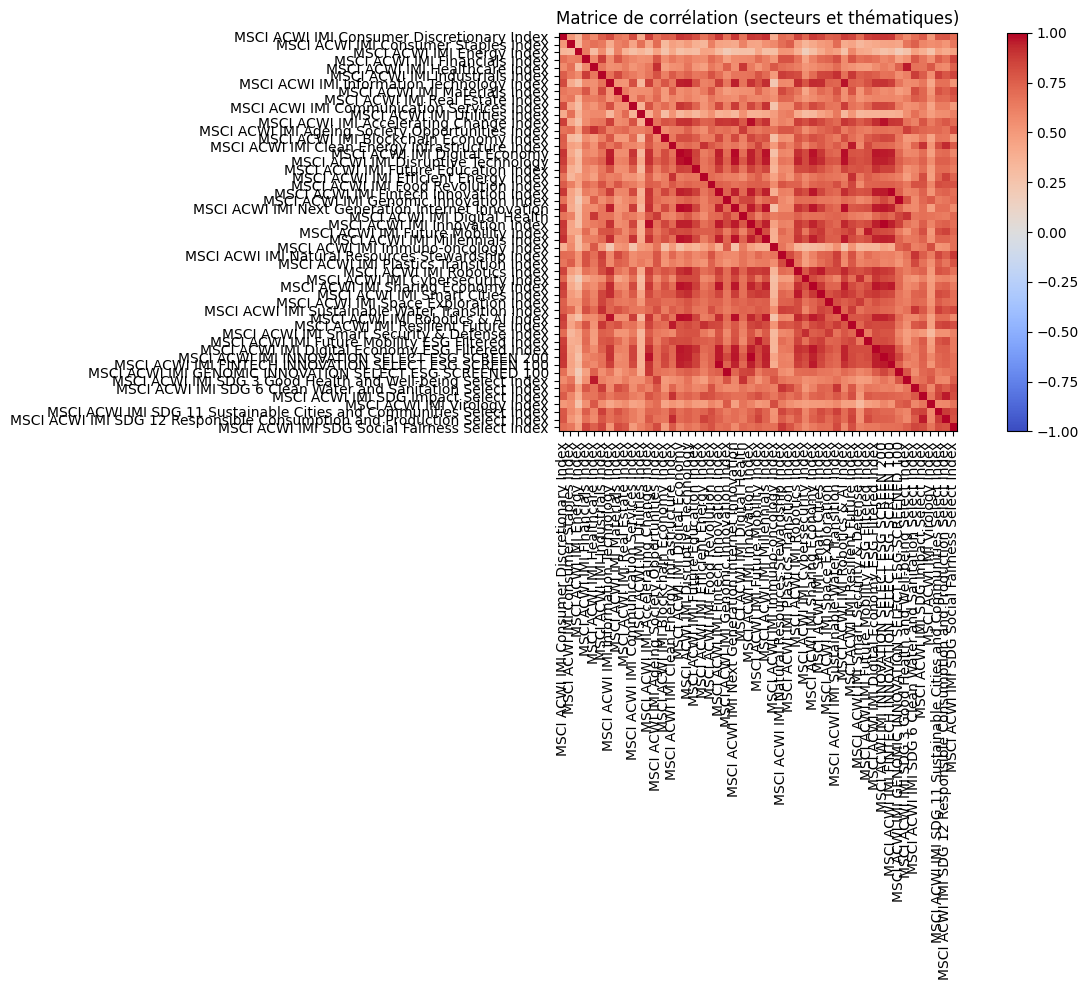

In [15]:
plt.figure(figsize=(14, 10))
im = plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.045)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Matrice de corrélation (secteurs et thématiques)")
plt.tight_layout()
plt.show()


In [16]:
# On extrait seulement les colonnes des secteurs (sans la colonne 'date')
returns_secteurs = df_sectors[cols_secteurs]

# Calcul de la matrice de corrélation entre secteurs
correlation_matrix_secteurs = returns_secteurs.corr()

print("Matrice de corrélation entre secteurs :")
print(correlation_matrix_secteurs.round(2))


Matrice de corrélation entre secteurs :
                                            MSCI ACWI IMI Consumer Discretionary Index  \
MSCI ACWI IMI Consumer Discretionary Index                                        1.00   
MSCI ACWI IMI Consumer Staples Index                                              0.51   
MSCI ACWI IMI Energy Index                                                        0.35   
MSCI ACWI IMI Financials Index                                                    0.69   
MSCI ACWI IMI Healthcare Index                                                    0.56   
MSCI ACWI IMI Industrials Index                                                   0.76   
MSCI ACWI IMI Information Technology Index                                        0.83   
MSCI ACWI IMI Materials Index                                                     0.65   
MSCI ACWI IMI Real Estate Index                                                   0.62   
MSCI ACWI IMI Communication Services Index                  

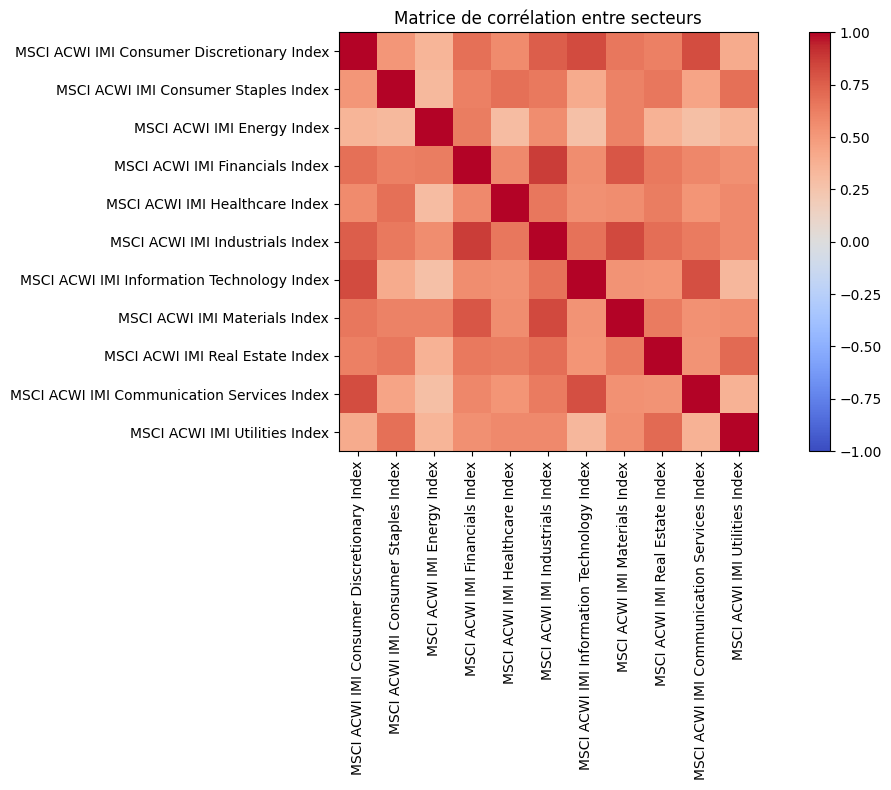

In [17]:
plt.figure(figsize=(12, 8))
im = plt.imshow(correlation_matrix_secteurs, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.045)
plt.xticks(range(len(correlation_matrix_secteurs.columns)), correlation_matrix_secteurs.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_secteurs.columns)), correlation_matrix_secteurs.columns)
plt.title("Matrice de corrélation entre secteurs")
plt.tight_layout()
plt.show()


In [18]:
# Les secteurs sont globalement corrélés, on peut le constater grâce à la matrice affichée précédemment.
# Pour quantifier ce phénomène, on affiche la médiane et la moyenne des coefficients de corrélation (hors diagonale).

import numpy as np

# On extrait les valeurs hors diagonale
corr_vals = correlation_matrix_secteurs.values
off_diag_values = corr_vals[~np.eye(corr_vals.shape[0],dtype=bool)]

moyenne_corr = np.mean(off_diag_values)
mediane_corr = np.median(off_diag_values)

print(f"Moyenne des corrélations hors diagonale entre secteurs : {moyenne_corr:.2f}")
print(f"Médiane des corrélations hors diagonale entre secteurs : {mediane_corr:.2f}")


Moyenne des corrélations hors diagonale entre secteurs : 0.57
Médiane des corrélations hors diagonale entre secteurs : 0.58


In [19]:
# On suppose que la colonne blockchain est la troisième colonne de df_thematic
# et que les secteurs sont listés dans cols_secteurs.

blockchain_returns = df_thematic.iloc[:, 2]  # 3ème colonne (indice 2)
scores_corr_blockchain = []
for secteur in cols_secteurs:
    corr = blockchain_returns.corr(df_sectors[secteur])
    scores_corr_blockchain.append((secteur, corr))
print("Scores de corrélation entre la thématique blockchain (df_thematic col 3) et les secteurs :")
for secteur, corr in scores_corr_blockchain:
    print(f"Sector: {secteur:20s} - Corr(Blockchain, {secteur}): {corr:.2f}")


Scores de corrélation entre la thématique blockchain (df_thematic col 3) et les secteurs :
Sector: MSCI ACWI IMI Consumer Discretionary Index - Corr(Blockchain, MSCI ACWI IMI Consumer Discretionary Index): 0.76
Sector: MSCI ACWI IMI Consumer Staples Index - Corr(Blockchain, MSCI ACWI IMI Consumer Staples Index): 0.32
Sector: MSCI ACWI IMI Energy Index - Corr(Blockchain, MSCI ACWI IMI Energy Index): 0.26
Sector: MSCI ACWI IMI Financials Index - Corr(Blockchain, MSCI ACWI IMI Financials Index): 0.55
Sector: MSCI ACWI IMI Healthcare Index - Corr(Blockchain, MSCI ACWI IMI Healthcare Index): 0.47
Sector: MSCI ACWI IMI Industrials Index - Corr(Blockchain, MSCI ACWI IMI Industrials Index): 0.62
Sector: MSCI ACWI IMI Information Technology Index - Corr(Blockchain, MSCI ACWI IMI Information Technology Index): 0.79
Sector: MSCI ACWI IMI Materials Index - Corr(Blockchain, MSCI ACWI IMI Materials Index): 0.49
Sector: MSCI ACWI IMI Real Estate Index - Corr(Blockchain, MSCI ACWI IMI Real Estate Inde